### All Imports

In [2]:

# import os
# import re
# import numpy as np 
# from sklearn.metrics import accuracy_score
# import transformers
# from transformers import BertTokenizer, BertModel
# from transformers import AutoModelForSequenceClassification
# from transformers import TFAutoModelForSequenceClassification
# from transformers import AutoTokenizer
# import torch
# from torch import cuda
# from tqdm import tqdm_notebook as tqdm
# from transformers import AutoModelForSequenceClassification
# from transformers import TFAutoModelForSequenceClassification
# from transformers import AutoTokenizer
# import numpy as np
# from scipy.special import softmax
# import csv
# import urllib.request
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt

In [5]:
dataset=pd.read_csv('predicted_output.csv')

/var/folders/yq/t04n__b92yl5wx1zlq8d6pq00000gn/T/ipykernel_67916/1528674096.py:1: DtypeWarning: Columns (0,5,6,8,13) have mixed types. Specify dtype option on import or set low_memory=False.
  dataset=pd.read_csv('predicted_output.csv')


In [6]:
dataset

,Unnamed: 0,user_name,user_location,user_description,user_created,user_followers,user_friends,user_favourites,user_verified,date,...,hashtags,source,is_retweet,emotion,loc1,loc2,anger,joy,optimism,sadness
0,17175,Jessica Luther Rummel,"denton, texas",Mother. Partner. Scholar. Activist. Alchemist....,2020-07-05 03:28:16,234,28,220.0,False,2020-07-24 23:47:08,...,NaN,Twitter Web App,False,joy,denton,texas,0.234784,0.294793,0.235554,0.234869
1,17174,Dr. Lipi #TrustDrFauci Roy,"new york, usa",@NBCNews @MSNBC @Forbes Medical Contributor | ...,2009-10-11 18:46:51,12485,4603,38120.0,True,2020-07-24 23:47:12,...,['covid19'],Twitter Web App,False,sadness,new york,usa,0.234835,0.235241,0.235095,0.294829
2,17173,Patty Hayes,"seattle, wa",Director of Public Health - Seattle & King Cou...,2017-07-07 18:56:50,718,162,2276.0,False,2020-07-24 23:47:12,...,['COVID19'],Twitter for Android,False,joy,seattle,wa,0.235177,0.294583,0.235338,0.234902
3,17172,Clive Gorman,"victoria, british columbia",Marketing Director @CNEGames for @idlechampion...,2011-12-23 02:02:35,597,224,23824.0,False,2020-07-24 23:47:12,...,['COVID19'],Twitter for Android,False,joy,victoria,british columbia,0.239036,0.269476,0.241188,0.250300
4,17171,Tristyn Russelo,"alberta, canada",NaN,2017-06-14 22:01:54,5,68,57.0,False,2020-07-24 23:47:13,...,NaN,Twitter Web App,False,sadness,alberta,canada,0.240844,0.234815,0.235718,0.288623
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
179108,166660,Dirk Haussecker,rna world,RNA(i) Therapeutics Investor-Scientist who lov...,2011-11-10 12:00:58,9341,339.0,7276.0,False,2020-08-30 09:07:25,...,NaN,Twitter Web App,False,joy,rna world,NaN,0.235192,0.294419,0.235536,0.234854
179109,166659,Natalie B 🔶️,england,single mum. Lib Dem. outspoken on Freedom of s...,2019-01-06 14:22:49,439,586.0,165.0,False,2020-08-30 09:07:25,...,['Tories'],Twitter for Android,False,sadness,england,NaN,0.245783,0.246070,0.253161,0.254986
179110,166658,Keith Bishop 👨‍👨‍👧‍👦 🏳️‍🌈,"newman university, uk","Foster Dad, Youth Worker & Senior Lecturer (Ch...",2015-06-20 10:56:58,1244,667.0,1140.0,False,2020-08-30 09:07:26,...,['COVID19'],Twitter for iPad,False,sadness,newman university,uk,0.244661,0.235900,0.238270,0.281169
179111,166657,Kings Place,"kings cross, london","An open, multi-arts venue presenting an advent...",2009-02-26 12:16:47,18930,6213.0,23986.0,False,2020-08-30 09:07:34,...,['Bach'],Twitter Web App,False,anger,kings cross,london,0.268694,0.253983,0.241060,0.236263


In [9]:
mask=(dataset['loc2']=='india') | (dataset['loc1']=='india')

In [10]:
dataset[mask]

,Unnamed: 0,user_name,user_location,user_description,user_created,user_followers,user_friends,user_favourites,user_verified,date,...,hashtags,source,is_retweet,emotion,loc1,loc2,anger,joy,optimism,sadness
1585,15590,Hindustan Times,india,One of India's largest media companies. Latest...,2009-04-29 10:11:34,7647812,126,2960.0,True,2020-07-25 00:56:10,...,['Covid19'],Twitter Web App,False,joy,india,NaN,0.234759,0.295417,0.235033,0.234791
1600,15575,Hindustan Times,india,One of India's largest media companies. Latest...,2009-04-29 10:11:34,7647812,126,2960.0,True,2020-07-25 00:57:04,...,['Covid19'],Twitter Web App,False,sadness,india,NaN,0.237600,0.242585,0.245363,0.274452
2270,14905,Zee News English,india,https://t.co/L9XS391Ajy brings latest news wit...,2008-12-12 06:01:55,5212675,51,2.0,True,2020-07-25 01:24:10,...,"['COVID19', 'coronavirus']",Twitter Web App,False,joy,india,NaN,0.235379,0.274738,0.245124,0.244759
2287,14888,Zee News English,india,https://t.co/L9XS391Ajy brings latest news wit...,2008-12-12 06:01:55,5212675,51,2.0,True,2020-07-25 01:24:36,...,"['COVID19', 'coronavirus', 'CoronaVirusUpdate']",Twitter Web App,False,joy,india,NaN,0.234856,0.294464,0.235810,0.234870
2384,14791,Hindustan Times,india,One of India's largest media companies. Latest...,2009-04-29 10:11:34,7647812,126,2960.0,True,2020-07-25 01:28:59,...,['Covid19'],Twitter Web App,False,anger,india,NaN,0.295377,0.234909,0.234876,0.234839
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
178911,166857,Twitter Moments India,india,The best of what’s happening on Twitter in an ...,2016-06-01 21:09:54,85037,11.0,0.0,True,2020-08-30 08:59:03,...,['COVID19'],TweetDeck,False,sadness,india,NaN,0.234778,0.234899,0.234944,0.295378
178932,166842,Ketto,india,Asia's Most Trusted and Visited #Crowdfunding ...,2012-04-09 13:48:42,30486,1368.0,4563.0,True,2020-08-30 09:00:00,...,NaN,TweetDeck,False,anger,india,NaN,0.295423,0.234757,0.234805,0.235015
178992,166776,Jawad,india,"Wish to see my nation free from corruption, co...",2011-05-14 19:25:38,3419,2405.0,10481.0,False,2020-08-30 09:01:43,...,['COVID19'],Twitter for Android,False,sadness,india,NaN,0.237161,0.250133,0.247307,0.265399
178993,166775,The Hawk,india,▌Stay UpToDate - The Hawk is One of India's to...,2012-11-19 14:48:20,2111,802.0,14.0,False,2020-08-30 09:01:44,...,"['Mayawati', 'COVID19', 'Unlock4', 'BSP', 'UP']",Hocalwire Social Share,False,anger,india,NaN,0.269792,0.239416,0.243013,0.247779


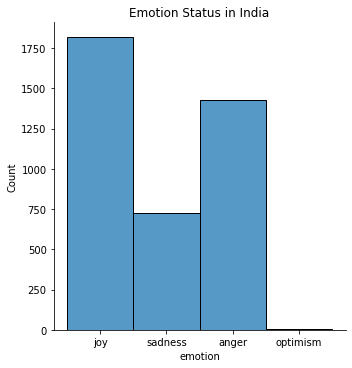

In [13]:
sns.displot(dataset[mask],x='emotion')
plt.title('Emotion Status in India')
plt.savefig("emotion_india.pdf")

In [19]:
dataset['loc2'].value_counts()

 india                   9095
 usa                     5119
 england                 3555
 ca                      3332
 ny                      2125
                         ... 
 bc)                        1
mi usa                      1
 ny and fairfield, nj       1
 co. monaghan               1
 spain, ny, us.             1
Name: loc2, Length: 4600, dtype: int64

In [ ]:
mask=(dataset['loc2']=='india') | (dataset['loc1']=='india')

In [23]:
mask = (dataset['user_location']=='us') | (dataset['user_location']=='usa') | (dataset['loc1'] == 'us') | (dataset['loc2'] == 'us') | (dataset['loc1'] == 'usa') | (dataset['loc2'] =='usa')

In [24]:
dataset[mask]

,Unnamed: 0,user_name,user_location,user_description,user_created,user_followers,user_friends,user_favourites,user_verified,date,...,hashtags,source,is_retweet,emotion,loc1,loc2,anger,joy,optimism,sadness
57,17118,Dawn Loves Life,usa,Let Go and Let God! Prayer is Powerful! : ),2008-11-29 04:48:04,1647,5002,105021.0,False,2020-07-24 23:49:42,...,"['CumberlandCounty', 'NC', 'Courthouse', 'COVI...",Twitter for iPhone,False,anger,usa,NaN,0.293939,0.234852,0.234943,0.236266
158,17017,Lunamoon ✨🌟✨🇺🇸✨🌟✨,usa,Jesus is my Savior 🙌🏻🙌🏻🌟Yeshua🌟🙌🏻🙌🏻🇺🇸🇺🇸🇺🇸Ameri...,2016-10-23 17:36:45,11364,11221,254790.0,False,2020-07-24 23:54:12,...,"['Jesus', 'Yeshua', 'Rapture', 'dreams']",Twitter Web App,False,joy,usa,NaN,0.235067,0.292965,0.236783,0.235185
236,16939,thelonevirologist,usa,"Virologist.Likes history, hiking & a good movi...",2014-03-27 16:58:36,10800,1266,4645.0,False,2020-07-24 23:57:02,...,"['COVID19', 'SARSCoV2']",Twitter for Mac,False,anger,usa,NaN,0.294869,0.234916,0.235185,0.235029
292,16883,Woonsup Choi,usa,physical geography; geography in general; #wat...,2009-06-12 16:22:50,223,314,2264.0,False,2020-07-24 23:59:49,...,['COVID19'],Twitter Web App,False,anger,usa,NaN,0.294491,0.234784,0.234928,0.235797
344,16831,PROMOrx,usa,"Since 2000, we’ve been prescribing branded pro...",2009-03-10 23:31:31,1611,2057,369.0,False,2020-07-25 00:00:48,...,"['CustomFaceMask', 'PrintedFaceMask', 'BeSafe'...",Hootsuite Inc.,False,joy,usa,NaN,0.234768,0.295385,0.235031,0.234816
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
177474,168295,Yaffa Lyulka,usa,"Live in the world. ❤️ #love, #travel, #tea & #...",2010-11-27 20:45:15,4280,4450.0,204130.0,False,2020-08-30 07:43:18,...,"['COVID19', 'DesperateLoser']",Twitter for iPhone,False,sadness,usa,NaN,0.246695,0.234806,0.235618,0.282881
177569,168199,Just Dad,usa,"Proud father, sports fan, advocate of the lig...",2017-07-04 21:10:25,6,487.0,3293.0,False,2020-08-30 07:49:18,...,"['BidenHarris2020', 'trumpfailed', 'TrumpVirus...",Twitter for Android,False,joy,usa,NaN,0.234922,0.294738,0.235504,0.234836
178501,167267,Calvin 🇺🇸,usa,"“He who stands for nothing, will kneel for any...",2010-09-06 03:33:31,584,1227.0,20143.0,False,2020-08-30 08:35:57,...,"['COVID19', 'coronavirus', 'COVID']",Twitter for iPhone,False,sadness,usa,NaN,0.260124,0.235590,0.235737,0.268549
178765,167003,Patrick Henningsen,usa,"Independent global affairs analyst, journalist...",2008-10-23 22:03:55,49846,2574.0,26296.0,True,2020-08-30 08:50:42,...,"['Fascist', 'YouTube', 'DavidIcke']",Twitter Web App,False,anger,usa,NaN,0.289332,0.235766,0.236789,0.238112


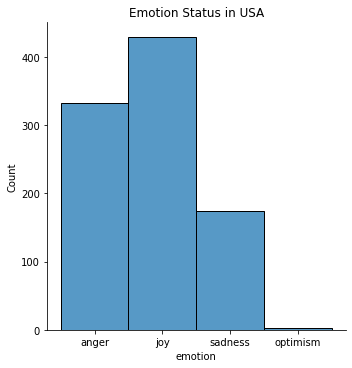

In [25]:
sns.displot(dataset[mask],x='emotion')
plt.title('Emotion Status in USA')
plt.savefig("emotion_usa.pdf")

In [28]:
mask =(dataset['user_location']=='ca') | (dataset['user_location']=='ny') | (dataset['loc2']=='ny') | (dataset['loc1']=='ny')| (dataset['loc2']=='ca') | (dataset['loc1']=='ca') |(dataset['user_location']=='us') | (dataset['user_location']=='usa') | (dataset['loc1'] == 'us') | (dataset['loc2'] == 'us') | (dataset['loc1'] == 'usa') | (dataset['loc2'] =='usa')

In [29]:
dataset[mask]

,Unnamed: 0,user_name,user_location,user_description,user_created,user_followers,user_friends,user_favourites,user_verified,date,...,hashtags,source,is_retweet,emotion,loc1,loc2,anger,joy,optimism,sadness
57,17118,Dawn Loves Life,usa,Let Go and Let God! Prayer is Powerful! : ),2008-11-29 04:48:04,1647,5002,105021.0,False,2020-07-24 23:49:42,...,"['CumberlandCounty', 'NC', 'Courthouse', 'COVI...",Twitter for iPhone,False,anger,usa,NaN,0.293939,0.234852,0.234943,0.236266
132,17043,syrilGee,"san francisco,ca","No one famous, don’t want to be. Just want to ...",2009-06-05 07:44:50,49,233,392.0,False,2020-07-24 23:52:46,...,['EssentialWorkers'],Twitter for iPhone,False,anger,san francisco,ca,0.276726,0.234901,0.235266,0.253107
158,17017,Lunamoon ✨🌟✨🇺🇸✨🌟✨,usa,Jesus is my Savior 🙌🏻🙌🏻🌟Yeshua🌟🙌🏻🙌🏻🇺🇸🇺🇸🇺🇸Ameri...,2016-10-23 17:36:45,11364,11221,254790.0,False,2020-07-24 23:54:12,...,"['Jesus', 'Yeshua', 'Rapture', 'dreams']",Twitter Web App,False,joy,usa,NaN,0.235067,0.292965,0.236783,0.235185
236,16939,thelonevirologist,usa,"Virologist.Likes history, hiking & a good movi...",2014-03-27 16:58:36,10800,1266,4645.0,False,2020-07-24 23:57:02,...,"['COVID19', 'SARSCoV2']",Twitter for Mac,False,anger,usa,NaN,0.294869,0.234916,0.235185,0.235029
292,16883,Woonsup Choi,usa,physical geography; geography in general; #wat...,2009-06-12 16:22:50,223,314,2264.0,False,2020-07-24 23:59:49,...,['COVID19'],Twitter Web App,False,anger,usa,NaN,0.294491,0.234784,0.234928,0.235797
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
177474,168295,Yaffa Lyulka,usa,"Live in the world. ❤️ #love, #travel, #tea & #...",2010-11-27 20:45:15,4280,4450.0,204130.0,False,2020-08-30 07:43:18,...,"['COVID19', 'DesperateLoser']",Twitter for iPhone,False,sadness,usa,NaN,0.246695,0.234806,0.235618,0.282881
177569,168199,Just Dad,usa,"Proud father, sports fan, advocate of the lig...",2017-07-04 21:10:25,6,487.0,3293.0,False,2020-08-30 07:49:18,...,"['BidenHarris2020', 'trumpfailed', 'TrumpVirus...",Twitter for Android,False,joy,usa,NaN,0.234922,0.294738,0.235504,0.234836
178501,167267,Calvin 🇺🇸,usa,"“He who stands for nothing, will kneel for any...",2010-09-06 03:33:31,584,1227.0,20143.0,False,2020-08-30 08:35:57,...,"['COVID19', 'coronavirus', 'COVID']",Twitter for iPhone,False,sadness,usa,NaN,0.260124,0.235590,0.235737,0.268549
178765,167003,Patrick Henningsen,usa,"Independent global affairs analyst, journalist...",2008-10-23 22:03:55,49846,2574.0,26296.0,True,2020-08-30 08:50:42,...,"['Fascist', 'YouTube', 'DavidIcke']",Twitter Web App,False,anger,usa,NaN,0.289332,0.235766,0.236789,0.238112


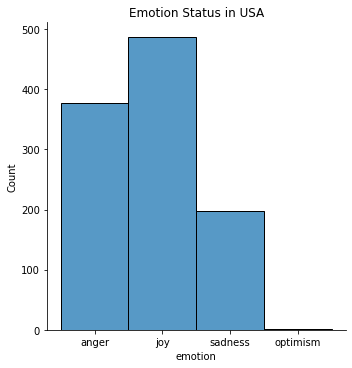

In [30]:
sns.displot(dataset[mask],x='emotion')
plt.title('Emotion Status in USA')
plt.savefig("emotion_usa.pdf")

       Unnamed: 0                                 user_name  \
283         16892                                    pv1004   
395         16780                                   Penpals   
498         16677                            writtenbySadia   
1855        15318                                    pv1004   
3998        13176  GroupCall - free prayer conference calls   
...           ...                                       ...   
178445     167323                                     GIRFT   
178479     167289                         Absquatulate #KBF   
179016     166752                                Rob Havard   
179059     166709                                Reggie Noo   
179109     166659                              Natalie B 🔶️   

                  user_location  \
283     england, united kingdom   
395     england, united kingdom   
498     england, united kingdom   
1855    england, united kingdom   
3998    england, united kingdom   
...                         ...  

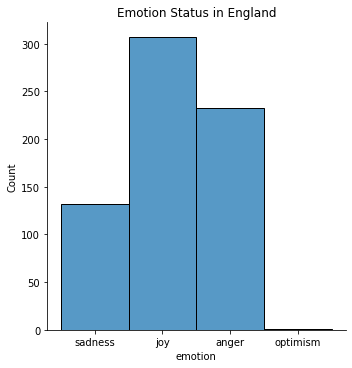

In [34]:
mask=(dataset['loc1']=='england')| (dataset['loc2']=='england')| (dataset['user_location']=='england')
print(dataset[mask])
sns.displot(dataset[mask],x='emotion')
plt.title('Emotion Status in England')
plt.savefig("emotion_england.pdf")

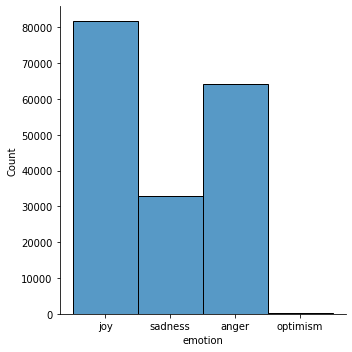

In [ ]:
sns.displot(dataset['emotion'])
plt.savefig('emotion_frequency.pdf')

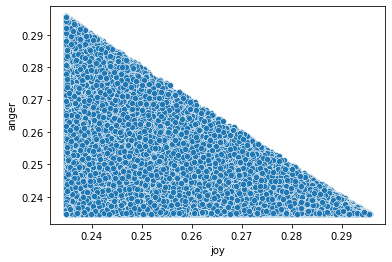

In [6]:
sns.scatterplot(data=dataset,x=dataset['joy'],y=dataset['anger'])
plt.savefig('joy_vs_anger.pdf')